## Downloading dataset from sklearn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")

bike_sharing = fetch_openml(
    "Bike_Sharing_Demand", version=2, as_frame=True
)

df = bike_sharing.frame


In [3]:
# print the dataframe
display(df)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000,16.0
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,40.0
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,32.0
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,13.0
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1.0,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,119.0
17375,spring,1.0,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,89.0
17376,spring,1.0,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014,90.0
17377,spring,1.0,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981,61.0


## Correlation matrix

Formally, the correlation is defined as normalized covariance, i.e., $corr(A,B)={cov(A,B)\over \sigma_A \sigma_B}$, where $\sigma_A=\sqrt{Var(A)}$ is the standard deviation of A.

Below, the correlation between columns of the dataframe is calculated using the dataframe.corr() function.

In [4]:
temp = df["temp"]
feel_temp = df["feel_temp"]
humidity = df["humidity"]
windspeed = df["windspeed"]
data = {"temp" : temp, "feel_temp" : feel_temp, "humidity" : humidity, "windspeed" : windspeed}
dataf = pd.DataFrame(data)
corr = dataf.corr()
print(corr)
print()
print("Temp and feel_temp are most positively correlated.")

               temp  feel_temp  humidity  windspeed
temp       1.000000   0.987672 -0.069881  -0.023125
feel_temp  0.987672   1.000000 -0.051918  -0.062336
humidity  -0.069881  -0.051918  1.000000  -0.290105
windspeed -0.023125  -0.062336 -0.290105   1.000000

Temp and feel_temp are most positively correlated.


## Histogram of temperatures

<function matplotlib.pyplot.show(close=None, block=None)>

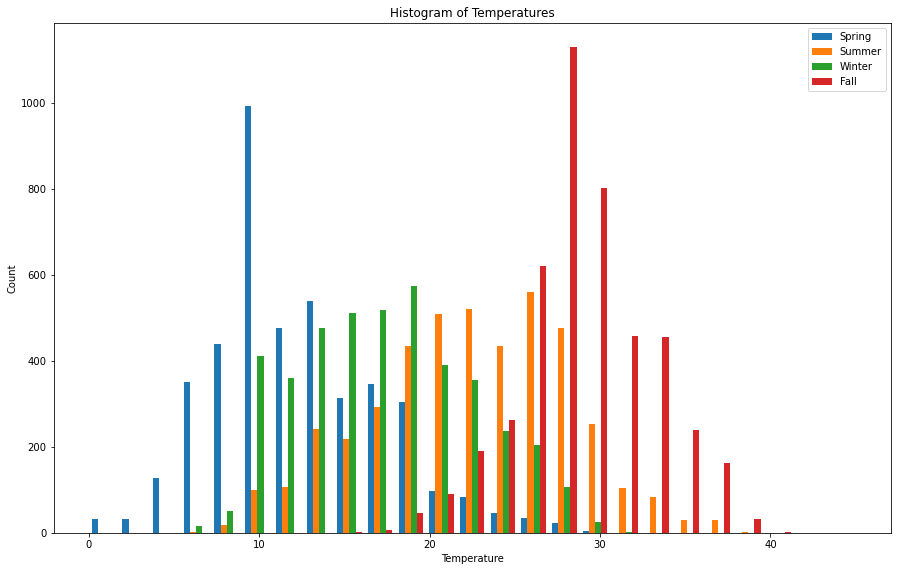

In [8]:
# write your code here
type0_df = df[df['season'] == "spring"]
type1_df = df[df['season']=="summer"]
type2_df = df[df['season']=="winter"]
type3_df = df[df['season']=="fall"]

a = type0_df['temp'].values
b = type1_df['temp'].values
c = type2_df['temp'].values
d = type3_df['temp'].values

plt.figure(figsize=(15,30))
common_params = dict(bins=25, 
                     range=(0, 45))
plt.subplots_adjust(hspace=.1)
plt.subplot(312)
plt.title('Histogram of Temperatures')
plt.hist(( a,  b, c, d), **common_params, label=("Spring", "Summer", "Winter", "Fall"))
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show


## Scatter plot


Fall has a unique relationship with temp and humidity as the relationship seems strongly negatively correlated.


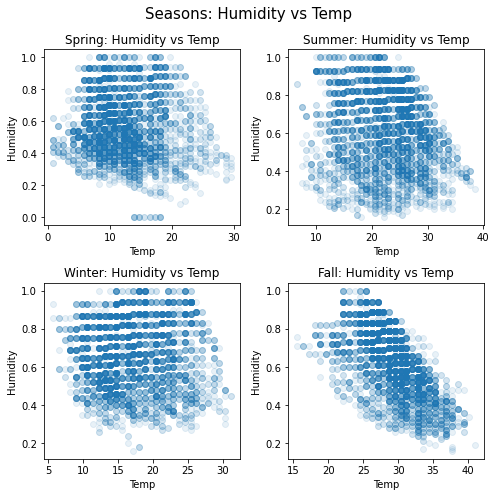

In [130]:
h1 = type0_df['humidity'].values
h2 = type1_df['humidity'].values
h3 = type2_df['humidity'].values
h4 = type3_df['humidity'].values


fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
fig.suptitle("Seasons: Humidity vs Temp", fontsize=15)


axes[0][0].scatter(a, h1, alpha=.1)
axes[0][0].set_title("Spring: Humidity vs Temp")
axes[0][0].set_xlabel("Temp")
axes[0][0].set_ylabel("Humidity")


axes[0][1].scatter(b, h2, alpha=.1)
axes[0][1].set_title("Summer: Humidity vs Temp")
axes[0][1].set_xlabel("Temp")
axes[0][1].set_ylabel("Humidity")

axes[1][0].scatter(c, h3, alpha=.1)
axes[1][0].set_title("Winter: Humidity vs Temp")
axes[1][0].set_xlabel("Temp")
axes[1][0].set_ylabel("Humidity")

axes[1][1].scatter(d, h4, alpha=.1)
axes[1][1].set_title("Fall: Humidity vs Temp")
axes[1][1].set_xlabel("Temp")
axes[1][1].set_ylabel("Humidity")

print()
print("Fall has a unique relationship with temp and humidity as the relationship seems strongly negatively correlated.")


## Boxplot

Text(0.5, 1.0, '')

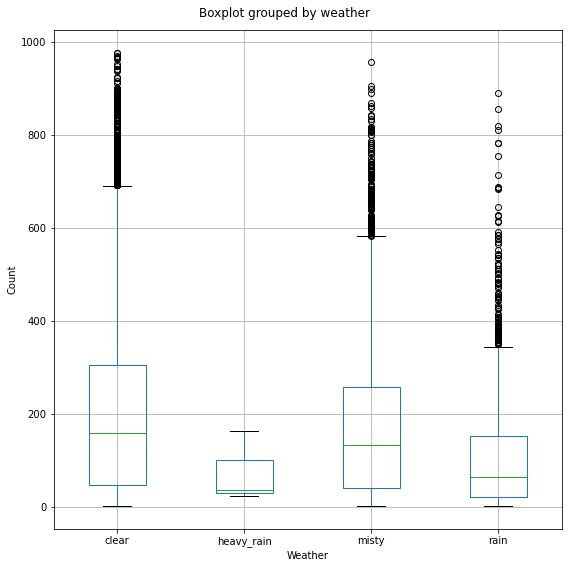

In [152]:
# write your code here

bplot=df.boxplot(column=("count"), by="weather", figsize=(8,8))
bplot.set_ylabel("Count")
bplot.set_xlabel("Weather")
bplot.set_title("")


## Time series

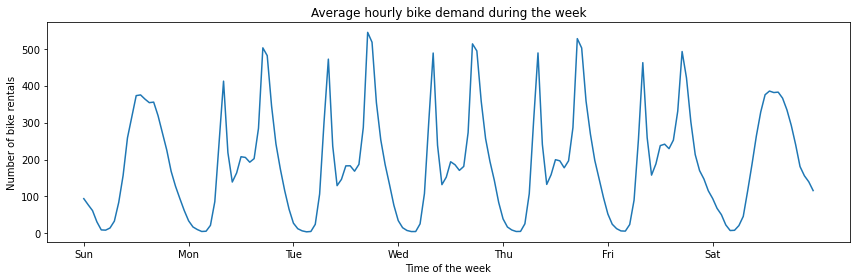

In [221]:
filtered_df = df[['weekday','hour','count']]
fig, ax = plt.subplots(figsize=(12, 4))

# write your code here
data=filtered_df.groupby(["weekday", "hour"]).mean()
count= data['count'].values
ax.plot(count)

# Set up ticks and labels. 
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)